# Example 3

This notebook computes total decay rates for a few models

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import DarkNews as dn
from DarkNews import *

In [4]:
import ToyAnalysis as ta

In [5]:
from DarkNews.GenLauncher import GenLauncher
kwargs={'m5': 0.15, 'm4': 0.1, 'mzprime': 1.25,'Umu5': 1.6e-3, 'Umu4': 0.0}
# kwargs={'m5': 0.15, 'm4': 0.075, 'mzprime': 1.25,'Umu5': 0.0, 'Umu4': 0.0, 'theta': 0.9e-1, 's_mu5': 1e-1, 'mhprime': 1.0}
gen_object = GenLauncher(exp="miniboone_fhc", HNLtype='dirac', loglevel="WARNING", neval=1e4, **kwargs)
df=gen_object.run()

Note that the directory tree for this run already exists.


In [6]:
print(df.w_event_rate.sum())

19089.43761036099


In [7]:
ta.plot_tools.plot_all_rates(df, case_name='example_3/rate', Nevents=None, loc='')
# ta.plot_tools.batch_plot(df, 'plots/example_3/', title='DarKNews')

NameError: name 'axes_form' is not defined

<Figure size 432x288 with 0 Axes>

### MiniBooNE efficiencies


In [ ]:
eff_func = scipy.interpolate.interp1d(enu_c, eff, fill_value=(eff[0],eff[-1]), bounds_error=False, kind='nearest')

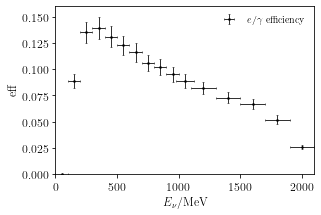

In [ ]:
fig,ax = ta.plot_tools.std_fig()
enu_c, eff, err_eff = np.genfromtxt("aux_data/miniboone_eff/eg_effs.dat",unpack=True)
enu_w = (np.append(enu_c[1:],2200)-enu_c)


kwargs={'facecolor': 'dodgerblue', 'edgecolor': 'None'}
ta.plot_tools.data_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency')
# ta.plot_tools.errorband_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency', **kwargs)
ax.legend(loc='upper right', )

ax.set_ylim(0,0.160)
ax.set_xlim(0,2100)
ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"eff")

ta.plot_tools.std_savefig(fig, 'plots/miniboone_effs.pdf')

In [23]:
T=1.6e-4 # eV

mnu = np.sqrt(2e-3) # eV
N_nu = 300 # nus/cm^3 
convert = dn.const.invcm3_to_eV3 # cm^-3 --> eV^3

print(f"\delta m_phi/y_phi = {np.sqrt(N_nu*convert/mnu):.2g} eV")

\delta m_phi/y_phi = 7.2e-06 eV


In [123]:
mphi = 1e-14
print(f"delta m_nu = {1e-20*0.3e9/mphi*dn.const.invcm3_to_eV3/mnu**2:.2g} eV")

delta m_nu = 1.2e-09 eV


In [35]:
def gamma_heavy(m4, mz, Valpha4_alphaepsilon2, D_or_M):
    # to accept floats
    m4 = np.asarray(m4)
    mz = np.asarray(mz)
    Valpha4_alphaepsilon2 = np.asarray(Valpha4_alphaepsilon2)
    D_or_M = np.asarray(D_or_M)
    
    '''there is a cancellation for small r that holds up to 4th order, so I avoid instability by expanding when r is small'''
    r = ((m4/mz)**2)
    gamma = Valpha4_alphaepsilon2/12.0/np.pi/r**2 * m4
    # avoiding evaluation of bad expression
    piece = np.where(r>0.01,
                     (6*(r - r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3),
                     r**4/2)
    gamma *= piece
    gamma = np.asarray(gamma)
    gamma[D_or_M == 'dirac'] /= 2
    return gamma


In [125]:
alphaeps2 = const.alphaQED*1e-4
const.get_decay_rate_in_cm(gamma_heavy(0.100, 1.25, alphaeps2, D_or_M='dirac'))


0.9955253028301461

In [121]:
def L(x):
    # return np.where(x>0.01, 
    #                 12*(x**(-3) - 0.5*x**(-2) - 1/x**4*(1-x)*np.log(x/(1-x))) - 1/x,
    #                 1)
    return 12*(x - x**2/2 - x**3/6 - (1-x)*np.log(1/(1-x)))

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_8013/3802361246.py:5: RuntimeWarning: invalid value encountered in log
  return 12*(x - x**2/2 - x**3/6 - (1-x)*np.log(1/(1-x)))


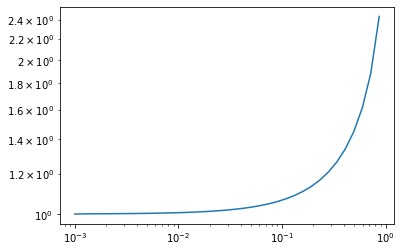

In [122]:
x=np.geomspace(1e-3,10)
plt.loglog(x,L(x)/x**4)                                

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_8013/3406407842.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x/(1-x)))


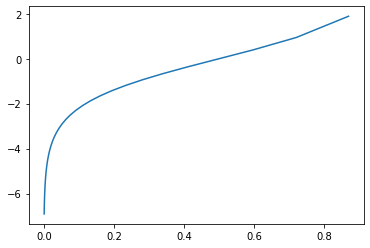

In [102]:
plt.plot(x,np.log(x/(1-x)))